In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
pd.set_option('display.max_columns', 22)
pd.set_option('display.max_rows', 300)

In [2]:
data = pd.read_csv("../data_sets/Employee_Compensation_SF.csv")

In [3]:
data.head()

,Year Type,Year,Organization Group Code,Organization Group,Department Code,Department,Union Code,Union,Job Family Code,Job Family,Job Code,Job,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,Fiscal,2016,1,Public Protection,DAT,District Attorney,311.0,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,Calendar,2013,5,Culture & Recreation,ART,Arts Commission,790.0,"SEIU - Miscellaneous, Local 1021",1800,"Budget, Admn & Stats Analysis",1844,Senior Management Assistant,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,Calendar,2015,4,Community Health,DPH,Public Health,535.0,"SEIU - Human Services, Local 1021",2900,Human Services,2903,Eligibility Worker,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,Fiscal,2015,4,Community Health,DPH,Public Health,250.0,"SEIU - Health Workers, Local 1021",2200,Medical & Dental,2202,Dental Aide,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,Fiscal,2014,5,Culture & Recreation,REC,Recreation and Park Commission,790.0,"SEIU - Miscellaneous, Local 1021",3200,Recreation,3279,Recreation Leader,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


In [4]:
le = LabelEncoder()
data['Organization Group']= le.fit_transform(data['Organization Group'])

In [5]:
data.drop(data.columns[[0, 4, 5, 7, 8, 9, 10, 11]], axis = 1, inplace = True)

In [6]:
data.head(100)

,Year,Organization Group Code,Organization Group,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,2016,1,5,311.0,49919,114473.16,0.00,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,2013,5,1,790.0,1225,84077.11,0.00,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,2015,4,0,535.0,34873,9980.17,0.00,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,2015,4,0,250.0,51145,2873.41,0.00,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,2014,5,1,790.0,48705,6701.85,0.00,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64
5,2013,2,6,21.0,19801,45321.18,0.00,0.00,45321.18,9386.03,11780.60,3486.34,24652.97,69974.15
6,2015,5,1,790.0,14135,28305.50,0.00,1193.14,29498.64,6616.52,5793.48,2430.74,14840.74,44339.38
7,2014,6,2,21.0,37352,39938.09,0.00,800.00,40738.09,8685.34,7269.02,3277.52,19231.88,59969.97
8,2015,1,5,911.0,13380,23112.00,2312.73,20944.16,46368.89,4183.12,1911.46,68.84,6163.42,52532.31
9,2014,1,5,498.0,46569,89101.22,6856.77,5563.78,101521.77,17596.33,12512.55,1627.91,31736.79,133258.56


In [7]:
new_data = data.dropna()

In [8]:
num = new_data._get_numeric_data()
num[num < 0] = 0
new_data.head()

,Year,Organization Group Code,Organization Group,Union Code,Employee Identifier,Salaries,Overtime,Other Salaries,Total Salary,Retirement,Health/Dental,Other Benefits,Total Benefits,Total Compensation
0,2016,1,5,311.0,49919,114473.16,0.0,1500.00,115973.16,21025.98,13068.80,9368.71,43463.49,159436.65
1,2013,5,1,790.0,1225,84077.11,0.0,0.00,84077.11,16587.30,12457.73,6931.91,35976.94,120054.05
2,2015,4,0,535.0,34873,9980.17,0.0,798.43,10778.60,0.00,2254.93,835.11,3090.04,13868.64
3,2015,4,0,250.0,51145,2873.41,0.0,0.00,2873.41,0.00,622.63,222.46,845.09,3718.50
4,2014,5,1,790.0,48705,6701.85,0.0,176.70,6878.55,0.00,2711.66,538.43,3250.09,10128.64


In [9]:
new_data['Organization Group'].unique()

array([5, 1, 0, 6, 2, 4, 3])

In [10]:
print(len(new_data.columns))

14


In [11]:
X1 = new_data.iloc[:,0:2]
X2 = new_data.iloc[:,3:14]
X = pd.concat([X1, X2],axis=1)
y = new_data.iloc[:,2]

In [12]:
print(X.columns)
print(y)

Index(['Year', 'Organization Group Code', 'Union Code', 'Employee Identifier',
       'Salaries', 'Overtime', 'Other Salaries', 'Total Salary', 'Retirement',
       'Health/Dental', 'Other Benefits', 'Total Benefits',
       'Total Compensation'],
      dtype='object')
0         5
1         1
2         0
3         0
4         1
         ..
291820    4
291821    0
291822    0
291823    0
291824    6
Name: Organization Group, Length: 291782, dtype: int64


In [13]:
bestfeatures = SelectKBest(score_func=chi2, k=11)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(11,'Score'))

                      Specs         Score
12       Total Compensation  2.060089e+09
7              Total Salary  1.922160e+09
4                  Salaries  1.128500e+09
5                  Overtime  1.044301e+09
6            Other Salaries  6.312402e+08
11           Total Benefits  2.704428e+08
8                Retirement  2.672415e+08
10           Other Benefits  7.041319e+07
9             Health/Dental  6.240980e+07
2                Union Code  1.526416e+07
1   Organization Group Code  2.439875e+05


In [14]:
dfscores

,0
0,1.802813e-01
1,2.439875e+05
2,1.526416e+07
3,1.985195e+05
4,1.128500e+09
5,1.044301e+09
6,6.312402e+08
7,1.922160e+09
8,2.672415e+08
9,6.240980e+07


In [15]:
array = dfscores.values
array

array([[1.80281262e-01],
       [2.43987531e+05],
       [1.52641648e+07],
       [1.98519529e+05],
       [1.12850020e+09],
       [1.04430115e+09],
       [6.31240204e+08],
       [1.92215967e+09],
       [2.67241490e+08],
       [6.24098015e+07],
       [7.04131940e+07],
       [2.70442832e+08],
       [2.06008925e+09]])

In [16]:
for i in array:
    print(i)
    print(np.float64(i).astype(str))

[0.18028126]
0.18028126202013464
[243987.53135271]
243987.53135271353
[15264164.78228784]
15264164.782287844
[198519.52899489]
198519.52899488626
[1.1285002e+09]
1128500200.5776718
[1.04430115e+09]
1044301147.398399
[6.31240204e+08]
631240203.8441801
[1.92215967e+09]
1922159670.5243876
[2.6724149e+08]
267241490.49094096
[62409801.4750274]
62409801.475027405
[70413193.95257759]
70413193.95257759
[2.70442832e+08]
270442832.25754124
[2.06008925e+09]
2060089250.4379735


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

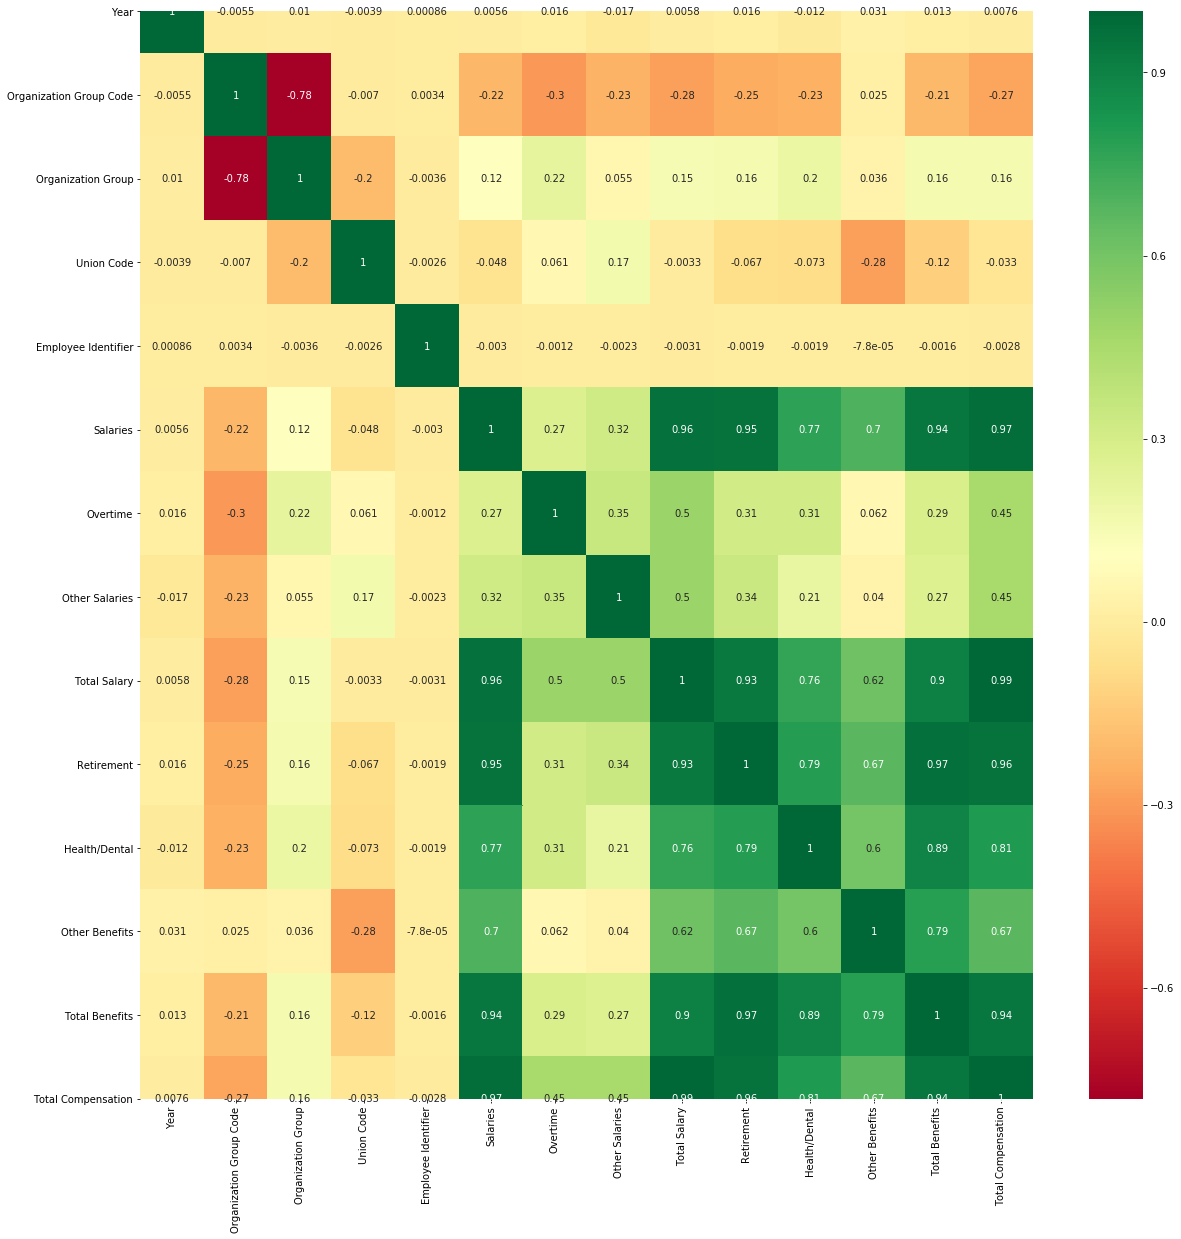

In [18]:
corrmat = new_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(new_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")